# IMPORTS

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/utils_fn')

In [4]:
from tensorflow import keras
from keras import layers, models, utils
import numpy as np
from pathlib import Path
from generate_dataset import *
from plot_history import *
from generate_classification_report import *
from plot_confusion_matrix import *
from predict_image import *

utils.set_random_seed(42)

# CONSTANTS

In [6]:
SAVE_NAME = f'Bare model'
DATASET_DIR = Path("/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/Ro_Sign_language_Dataset")
MODEL_SAVE_DIR = Path("/content/drive/MyDrive/Romanian-Sign-Language-Image-Classification/Saves")

BATCH_SIZE = 64
IMAGE_SIZE = (128, 128)
EPOCHS = 50

# PREPROCESSING

In [8]:
train_dataset, validation_dataset, test_dataset = generate_dataset(base_dir=DATASET_DIR, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE)

Found 15600 files belonging to 26 classes.
Found 5200 files belonging to 26 classes.
Found 5200 files belonging to 26 classes.


In [ ]:
rescale = layers.Rescaling(1./255)

# TRAINING

## ARCHITECTURE

In [ ]:
inputs = keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = rescale(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(26, activation="softmax")(x)
bare_model = keras.Model(inputs=inputs, outputs=outputs)

bare_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                        

In [ ]:
bare_model.compile(loss="categorical_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = str(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}.model.keras'),
                                             save_best_only=True,
                                             monitor="val_loss")]

history = bare_model.fit(train_dataset,
                         epochs=EPOCHS,
                         validation_data=validation_dataset,
                         callbacks=callbacks)

np.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}.history.npy', history.history)
bare_model.save(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}.model.h5', save_format='h5')

Epoch 1/50
245/245 [==============================] - 35s 121ms/step - loss: 1.7099 - accuracy: 0.4918 - val_loss: 0.9309 - val_accuracy: 0.7240
Epoch 2/50
245/245 [==============================] - 29s 117ms/step - loss: 0.1407 - accuracy: 0.9557 - val_loss: 0.7987 - val_accuracy: 0.8333
Epoch 3/50
245/245 [==============================] - 29s 114ms/step - loss: 0.0478 - accuracy: 0.9870 - val_loss: 0.8928 - val_accuracy: 0.8088
Epoch 4/50
245/245 [==============================] - 29s 115ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.6188 - val_accuracy: 0.8790
Epoch 5/50
245/245 [==============================] - 29s 116ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.8117 - val_accuracy: 0.8573
Epoch 6/50
245/245 [==============================] - 28s 113ms/step - loss: 0.0189 - accuracy: 0.9950 - val_loss: 0.8086 - val_accuracy: 0.8719
Epoch 7/50
245/245 [==============================] - 28s 113ms/step - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.6384 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


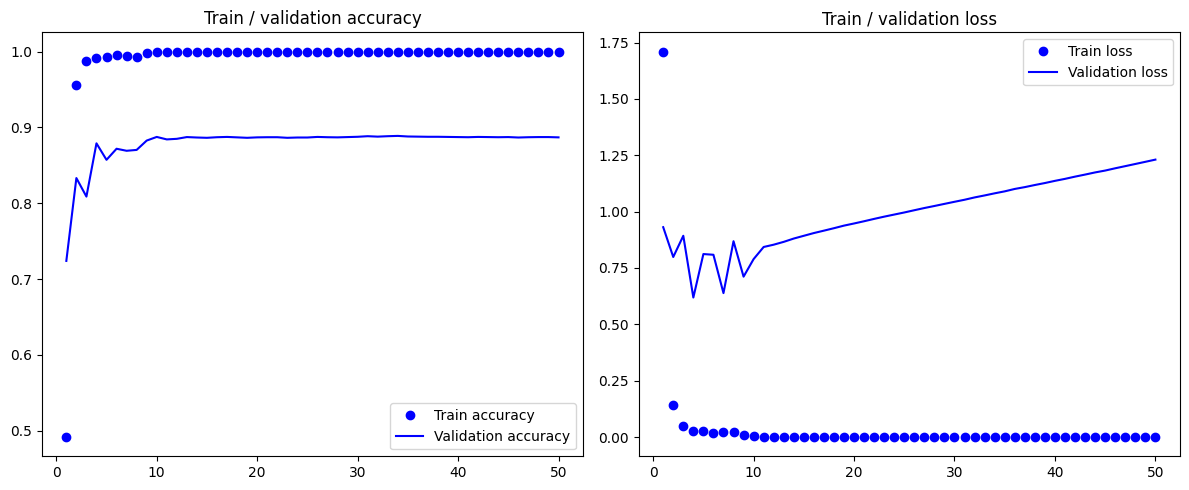

In [14]:
history = np.load(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}.history.npy', allow_pickle=True).item()

plot_history(history)

## EVALUATION

In [9]:
bare_model = keras.models.load_model(MODEL_SAVE_DIR / SAVE_NAME / f'{SAVE_NAME}.model.keras')
test_loss, test_acc = bare_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

82/82 [==============================] - 18s 217ms/step - loss: 1.2633 - accuracy: 0.8208
Test accuracy: 0.821


In [10]:
generate_classification_report(bare_model, test_dataset)

82/82 [==============================] - 17s 209ms/step
              precision    recall  f1-score   support

           A       0.73      0.98      0.84       200
          Â       0.91      0.93      0.92       200
          Ă       0.98      0.91      0.94       200
           B       0.91      1.00      0.95       200
           C       0.86      0.89      0.87       200
           D       0.86      0.67      0.75       200
           E       0.74      0.84      0.79       200
           F       0.86      0.70      0.77       200
           G       0.86      0.93      0.89       200
           H       0.91      0.92      0.91       200
           I       0.94      0.83      0.88       200
           K       0.88      0.92      0.89       200
           L       1.00      1.00      1.00       200
           M       0.61      0.92      0.73       200
           N       0.89      0.23      0.37       200
           O       0.71      0.99      0.83       200
           P       0.92  

82/82 [==============================] - 17s 208ms/step


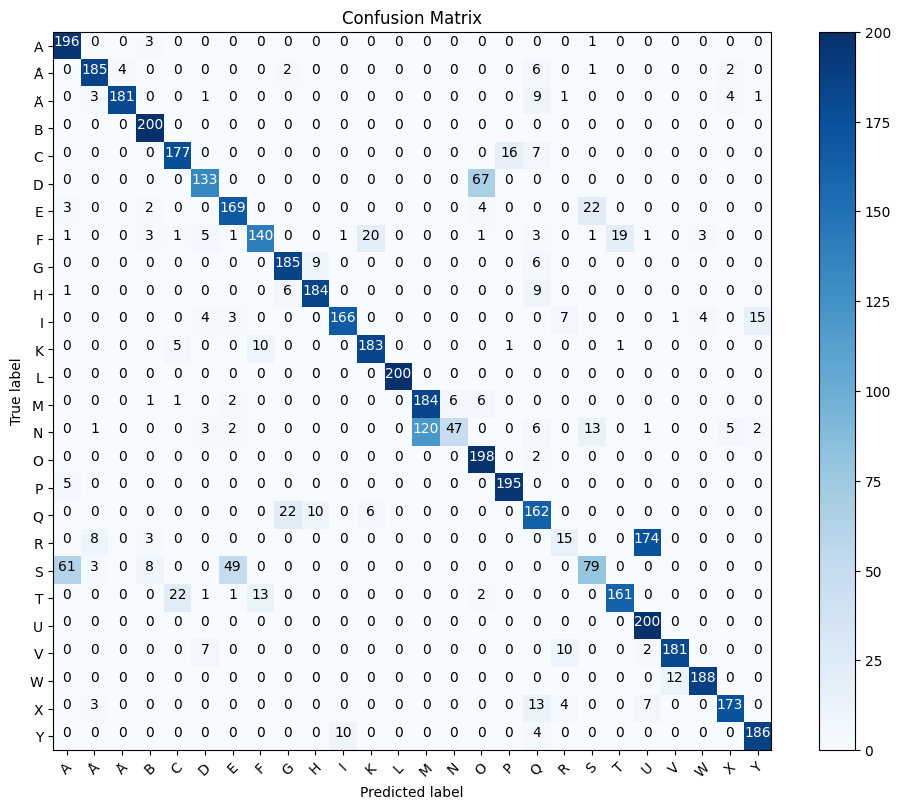

In [11]:
plot_confusion_matrix(bare_model, test_dataset)